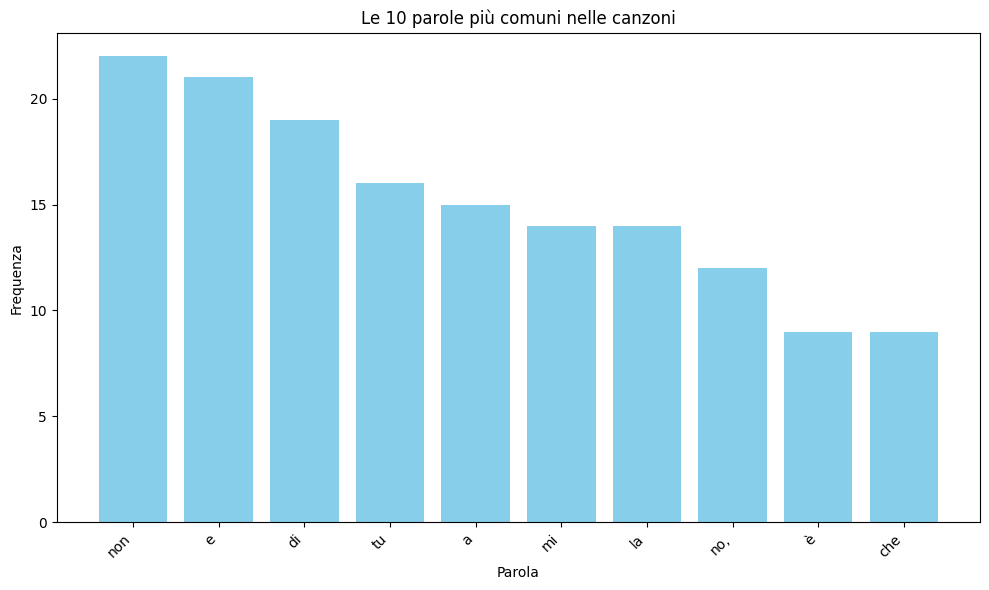

In [59]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Lista dei link alle canzoni
links = [
    "https://genius.com/Angelina-mango-la-noia-lyrics",
    "https://genius.com/Geolier-i-p-me-tu-p-te-lyrics",
    "https://genius.com/Annalisa-sinceramente-lyrics",
    "https://genius.com/Ghali-casa-mia-lyrics",
    "https://genius.com/Irama-tu-no-lyrics"
]

# Lista per memorizzare i testi delle canzoni
lyrics_list = []

# Estrazione dei testi delle canzoni dai link
for link in links:
    response = requests.get(link)

    if response.status_code == 200:
        # Utilizza BeautifulSoup per analizzare il contenuto della pagina
        soup = BeautifulSoup(response.content, "html.parser")

        lyrics_container = soup.find("div", {"data-lyrics-container": "true"})

        # Estrai il testo della canzone se è presente
        if lyrics_container:
            # Estrai solo il testo dalla struttura utilizzando un separator
            lyrics_text = lyrics_container.get_text(separator="\n").strip()
            lyrics_list.append(lyrics_text)
        else:
            lyrics_list.append("Testo non disponibile")
    else:
        lyrics_list.append("Errore nella richiesta HTTP")

# Unisci tutti i testi in unica stringa
all_lyrics = " ".join(lyrics_list)

# Tokenizzazione dei testi delle canzoni
words = all_lyrics.lower().split()  # Converti in minuscolo e divide in singole parole

# Conta la frequenza delle parole
word_freq = Counter(words)

# Trova le 10 parole più comuni
top_words = word_freq.most_common(10)

# Creare un DataFrame per le parole più comuni
df_top_words = pd.DataFrame(top_words, columns=["Parola", "Frequenza"])

# Visualizzare un grafico a barre con parole più comuni
plt.figure(figsize=(10, 6))
plt.bar(df_top_words["Parola"], df_top_words["Frequenza"], color="skyblue")
plt.xlabel("Parola")
plt.ylabel("Frequenza")
plt.title("Le 10 parole più comuni nelle canzoni")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

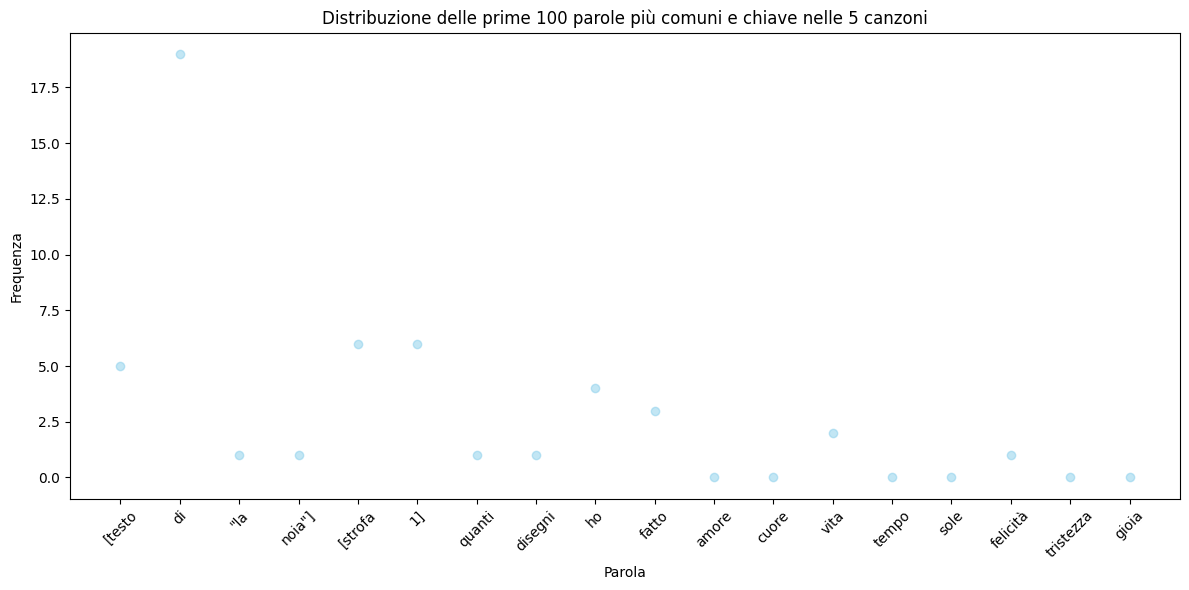

In [60]:
# Visualizza la frequenza con lo scatterplot
words_to_display = parole_da_visualizzare[:100]  # Seleziona le prime 100 parole più comuni e chiave
N = len(words_to_display)  # Numero di parole da visualizzare sull'asse x

plt.figure(figsize=(12, 6))
plt.scatter(words_to_display, [word_freq[word] for word in words_to_display], color='skyblue', alpha=0.5)
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle prime 100 parole più comuni e chiave nelle 5 canzoni')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: ylabel='Sentimento'>

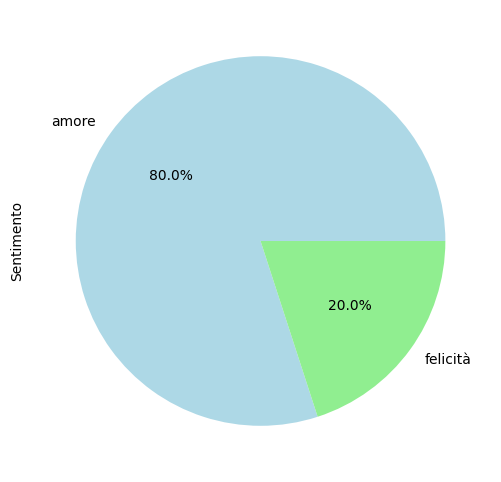

In [61]:
# Funzione per analizzare il sentiment di una canzone
def analizza_sentiment(testo):
    # Lista di parole chiave associate a diversi sentimenti o emozioni
    sentiment_keywords = {
        "amore": ["amore", "innamorato", "cuore", "passione"],
        "felicità": ["felicità", "gioia", "felice", "sorridente"],
        "tristezza": ["tristezza", "triste", "lacrima", "addolorato"],
        "rabbia": ["rabbia", "arrabbiato", "ira", "odio"]
    }

    # Inizializzo il conteggio delle parole chiave per ciascun sentiment
    sentiment_counts = {sentiment: 0 for sentiment in sentiment_keywords}

    # Conta quante volte compaiono le parole chiave associate a ciascun sentimento nel testo
    for word in testo.lower().split():
        for sentiment, keywords in sentiment_keywords.items():
            if word in keywords:
                sentiment_counts[sentiment] += 1

    # Trova il sentiment dominante ovvero conteggio più alto
    dominant_sentiment = max(sentiment_counts, key=sentiment_counts.get)

    return dominant_sentiment

# Analisi del sentiment per ogni canzone
sentimenti_canzoni = [analizza_sentiment(lyrics) for lyrics in lyrics_list]

# Creare un DataFrame per l'analisi del sentiment
df_sentimenti = pd.DataFrame(sentimenti_canzoni, columns=["Sentimento"])

# Visualizzare un grafico a torta del sentiment delle canzoni
plt.figure(figsize=(8, 6))
df_sentimenti["Sentimento"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightgreen", "pink"])